In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(25)
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
# data_y = 29*data_x + 4 * np.random.randn(100, 1)
data_x /= np.max(data_x)
data_x

array([[0.1       ],
       [0.10909091],
       [0.11818182],
       [0.12727273],
       [0.13636364],
       [0.14545455],
       [0.15454545],
       [0.16363636],
       [0.17272727],
       [0.18181818],
       [0.19090909],
       [0.2       ],
       [0.20909091],
       [0.21818182],
       [0.22727273],
       [0.23636364],
       [0.24545455],
       [0.25454545],
       [0.26363636],
       [0.27272727],
       [0.28181818],
       [0.29090909],
       [0.3       ],
       [0.30909091],
       [0.31818182],
       [0.32727273],
       [0.33636364],
       [0.34545455],
       [0.35454545],
       [0.36363636],
       [0.37272727],
       [0.38181818],
       [0.39090909],
       [0.4       ],
       [0.40909091],
       [0.41818182],
       [0.42727273],
       [0.43636364],
       [0.44545455],
       [0.45454545],
       [0.46363636],
       [0.47272727],
       [0.48181818],
       [0.49090909],
       [0.5       ],
       [0.50909091],
       [0.51818182],
       [0.527

In [0]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[1.        , 0.1       ],
       [1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.12727273],
       [1.        , 0.13636364],
       [1.        , 0.14545455],
       [1.        , 0.15454545],
       [1.        , 0.16363636],
       [1.        , 0.17272727],
       [1.        , 0.18181818],
       [1.        , 0.19090909],
       [1.        , 0.2       ],
       [1.        , 0.20909091],
       [1.        , 0.21818182],
       [1.        , 0.22727273],
       [1.        , 0.23636364],
       [1.        , 0.24545455],
       [1.        , 0.25454545],
       [1.        , 0.26363636],
       [1.        , 0.27272727],
       [1.        , 0.28181818],
       [1.        , 0.29090909],
       [1.        , 0.3       ],
       [1.        , 0.30909091],
       [1.        , 0.31818182],
       [1.        , 0.32727273],
       [1.        , 0.33636364],
       [1.        , 0.34545455],
       [1.        , 0.35454545],
       [1.        , 0.36363636],
       [1.

In [0]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print (test_x.size, train_x.size, test_y.size, train_y.size)
print (test_x)

40 160 20 80
[[1.         0.89090909]
 [1.         0.81818182]
 [1.         0.34545455]
 [1.         0.23636364]
 [1.         0.68181818]
 [1.         0.13636364]
 [1.         0.41818182]
 [1.         0.53636364]
 [1.         0.7       ]
 [1.         0.76363636]
 [1.         0.95454545]
 [1.         0.4       ]
 [1.         0.36363636]
 [1.         0.91818182]
 [1.         0.18181818]
 [1.         0.38181818]
 [1.         0.58181818]
 [1.         0.42727273]
 [1.         0.28181818]
 [1.         0.21818182]]


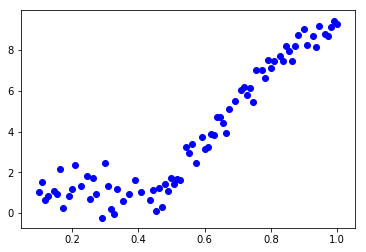

In [0]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [0]:
def get_gradient(w, x, y):
    y_estimate = (x**3).dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x**3)
    return gradient, mse

In [0]:
w = np.random.randn(2)
alpha = 0.9
tolerance = 1e-3
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
-1.1601753699446513 -1.1591302436975235
Iteration: 10 - Error: 2.9794
Updated Weights : 5.110601 , 2.589896
Iteration: 20 - Error: 1.3344
Updated Weights : 7.697042 , 1.775270
Iteration: 30 - Error: 0.9511
Updated Weights : 8.945525 , 1.382047
Iteration: 40 - Error: 0.8618
Updated Weights : 9.548172 , 1.192237
Iteration: 50 - Error: 0.8409
Updated Weights : 9.839072 , 1.100615
Iteration: 60 - Error: 0.8361
Updated Weights : 9.979490 , 1.056389
Iteration: 70 - Error: 0.8350
Updated Weights : 10.047270 , 1.035041
Iteration: 80 - Error: 0.8347
Updated Weights : 10.079988 , 1.024736
Iteration: 90 - Error: 0.8346
Updated Weights : 10.095781 , 1.019762
Converged
Final Weights : 10.100279 , 1.018345
Test Cost = 1.0214200091353607


In [0]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^3 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 10.100279.x^3 + 1.018345


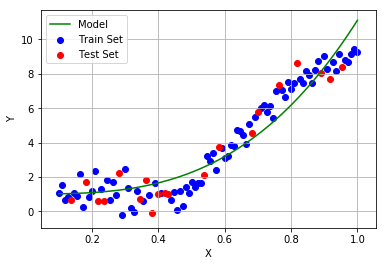

In [0]:
plt.plot(data_x[:,1], (data_x**3).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()